In [5]:
!pip install  spacy
!python -m spacy download en_core_web_sm
!python -m spacy info

  Using cached spacy-3.5.2-cp37-cp37m-macosx_10_9_x86_64.whl (6.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 237.7 kB/s eta 0:00:00a 0:00:01
  Using cached pydantic-1.10.7-cp37-cp37m-macosx_10_9_x86_64.whl (2.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.6 MB/s eta 0:00:00
  Using cached preshed-3.0.8-cp37-cp37m-macosx_10_9_x86_64.whl (105 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.0/842.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.3/489.3 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached cymem-2.0.7-cp37-cp37m-macosx_10_9_x86_64.whl (32 kB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 2.6 MB/s eta 0:00:0000:0100:01
2023-04-23 16:49:25.377812: I tensorflow/core/platf

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-04-23 16:49:56.868733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.

============================== Info about spaCy ==============================

spaCy version    3.5.2                         
Location         /Users/ngounepeetprogress/opt/anaconda3/envs/deepl/lib/python3.7/site-packages/spacy
Platform         Darwin-20.6.0-x86_64-i386-64bit
Python version   3.7.16                        
Pipelines        en_core_web_sm (3.5.0)        



In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [9]:
training_corpus = fetch_20newsgroups(subset='train')

In [12]:
print('Training data size: {}'.format(len(training_corpus.data)))

Training data size: 11314


In [14]:
# These are the possible topics a post can belong to.
training_corpus.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
# These are the labels/targets for each post.
training_corpus.target

array([7, 4, 4, ..., 3, 1, 8])

In [24]:
# Printing the first post and its corresponding label
print(training_corpus.data[0])
first_label = training_corpus.target[0]
print(f"Label for this post is {first_label}")
print(f"Corresponding topic for this post is {training_corpus.target_names[first_label]}")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Label for this post is 7
Corresponding topic for this post is rec.autos


When starting off with a dataset, it's a good idea to check its distribution. In this case, we can see at a glance this dataset is relatively balanced.

<AxesSubplot:ylabel='Frequency'>

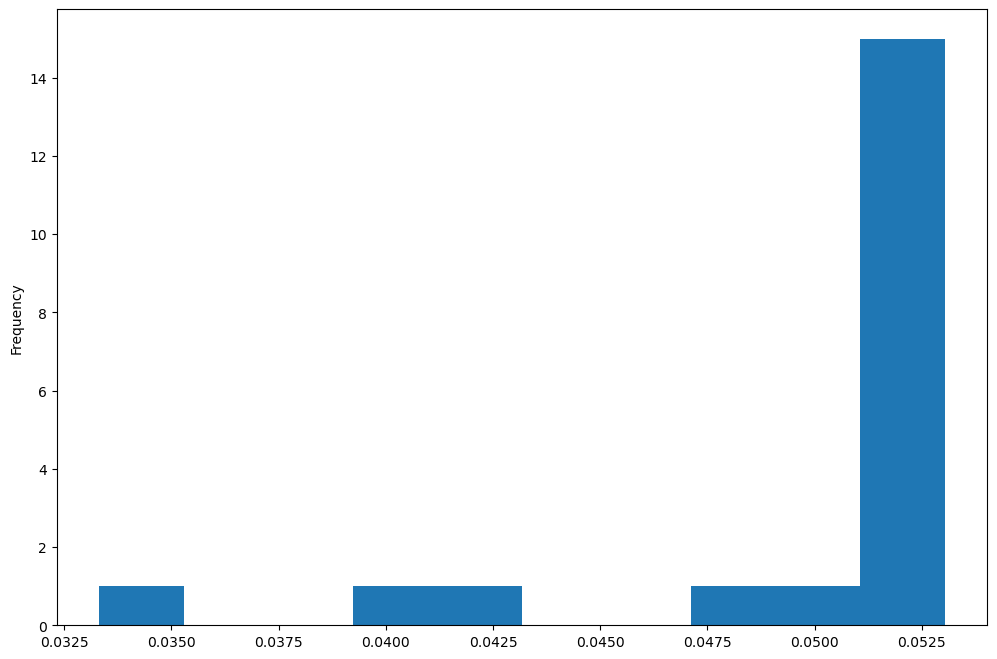

In [39]:
bins, counts = np.unique(training_corpus.target,return_counts=True)
plt.figure(figsize=(12, 8))

freq_series = pd.Series(counts/len(training_corpus.data))
freq_series.plot(kind='hist')

Now that we have our training set, we can split it further into train and validation sets (remember the test set, in this case, is a separate download). Creating a validation set isn't always necessary. If you have a small training set like this one, you can use alternative techniques like cross-validation but we'll show a split here since we talked about it in the model building module. scikit-learn has a module to help us do this.

In [43]:
# Shuffle, then split the data into train and validation sets. Set the random_state 
# to 1 for reproducibility.
train_data, val_data, train_labels, val_labels = train_test_split(training_corpus.data, training_corpus.target, train_size=0.8, random_state=1) 
print('Training data size: {}'.format(len(train_data)))
print('Validation data size: {}'.format(len(val_data)))

Training data size: 9051
Validation data size: 2263


Now that we have our train-validation split, let's create our spaCy

---
tokenizer. Up to this point, we've been using the **en_core_web_sm** model.

---


In [44]:
nlp = spacy.load('en_core_web_sm')

By default, it comes up with a preprocessing pipeline with several components enabled. We can view these components through the pipe_names attribute.

In [47]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [48]:
nlp.pipe_labels

{'tok2vec': [],
 'tagger': ['$',
  "''",
  ',',
  '-LRB-',
  '-RRB-',
  '.',
  ':',
  'ADD',
  'AFX',
  'CC',
  'CD',
  'DT',
  'EX',
  'FW',
  'HYPH',
  'IN',
  'JJ',
  'JJR',
  'JJS',
  'LS',
  'MD',
  'NFP',
  'NN',
  'NNP',
  'NNPS',
  'NNS',
  'PDT',
  'POS',
  'PRP',
  'PRP$',
  'RB',
  'RBR',
  'RBS',
  'RP',
  'SYM',
  'TO',
  'UH',
  'VB',
  'VBD',
  'VBG',
  'VBN',
  'VBP',
  'VBZ',
  'WDT',
  'WP',
  'WP$',
  'WRB',
  'XX',
  '_SP',
  '``'],
 'parser': ['ROOT',
  'acl',
  'acomp',
  'advcl',
  'advmod',
  'agent',
  'amod',
  'appos',
  'attr',
  'aux',
  'auxpass',
  'case',
  'cc',
  'ccomp',
  'compound',
  'conj',
  'csubj',
  'csubjpass',
  'dative',
  'dep',
  'det',
  'dobj',
  'expl',
  'intj',
  'mark',
  'meta',
  'neg',
  'nmod',
  'npadvmod',
  'nsubj',
  'nsubjpass',
  'nummod',
  'oprd',
  'parataxis',
  'pcomp',
  'pobj',
  'poss',
  'preconj',
  'predet',
  'prep',
  'prt',
  'punct',
  'quantmod',
  'relcl',
  'xcomp'],
 'attribute_ruler': [],
 'lemmatizer':

In the previous demos, we individually disabled any component we didn't need. For our first pass at building a Naive Bayes classifier, we'll try tokenizing alone. Nothing else. Since that's the case, it's easier to instantiate a blank pipeline.
https://spacy.io/api/top-level#spacy.blank

In [52]:
nlp = spacy.blank('en')
# There should be no pipeline components.
nlp.pipe_names

[]

In [79]:
# For this exercise, we'll remove punctuation and spaces (which
# includes newlines), filter for tokens consisting of alphabetic
# characters only, and return the token text.
def spacy_tokenizer(doc):
    return [t.text for t in nlp(doc) if 
           not t.is_punct and 
           not t.is_space and 
           t.is_alpha]

We'll vectorize using the TfidfVectorizer.

In [81]:
%%time
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
train_features_vect = vectorizer.fit_transform(train_data)

CPU times: user 36.8 s, sys: 165 ms, total: 37 s
Wall time: 37 s


Scikit-learn includes a multinomial naive bayes classifier.

:Calling *fit* on the classifier and passing it the feature vectors and corresponding labels kicks off the training.

In [87]:
## instantiate a classifier with default setting
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features_vect,train_labels)
nb_classifier.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Now that we know about the F1 score and have a multiclass problem, let's look at the F1 score on the training data. Since the dataset is balanced, accuracy could work here as well but we'll look at F1 since we introduced it. scikit-learn has a module called metrics we can leverage. It contains a variety of scoring utilities we can use.

In [90]:
trains_pred = nb_classifier.predict(train_features_vect)
print(f"F1 score on initial training set: {metrics.f1_score(train_labels,trains_pred,average='macro')}")

F1 score on initial training set: 0.8982344792497875


So right off the bat, using simple preprocessing and vectorization, and the default settings on the Naive Bayes classifier, we get a model with a decent F1 score. This looks good, but there's a problem.

When we downloaded the training data, we also included headers and footers which contain metadata like subject, and email.

This can be a problem because these fields may be highly informative, causing the model to predict mostly based on the metadata rather than the post content. But if this metadata isn't available at prediction time in production, then our model is going to perform poorly. 

So let's retrieve the training data again but without the headers, footers, and post quotes this time. Just raw post text. This makes the problem notably harder for reasons we'll see soon.

In [93]:
# Remove headers, footers, and quotes from training set and resplit.
filter_training_corps =fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
train_data, val_data, train_labels, val_labels = train_test_split(filter_training_corps.data, filter_training_corps.target, train_size=0.8, random_state=1) 

In [100]:
# Revectorize our text and retrain our model.
vec = TfidfVectorizer(tokenizer=spacy_tokenizer)
new_train_feature_vec = vec.fit_transform(train_data)

In [101]:
nb_classifier.fit(new_train_feature_vec,train_labels)

MultinomialNB()

In [102]:
# Recheck F1 score on training data.
new_trains_pred = nb_classifier.predict(new_train_feature_vec)
print(f"F1 score on initial training set: {metrics.f1_score(train_labels,new_trains_pred,average='macro')}")

F1 score on initial training set: 0.791654644597863


In [103]:
# Vectorize the validation data.
validation_vec = vec.transform(val_data)


In [104]:
# Predict and evaluate.
val_pred=nb_classifier.predict(validation_vec)
print(f"F1 score on initial training set: {metrics.f1_score(val_labels,val_pred,average='macro')}")

F1 score on initial training set: 0.6087677070998413


That's quite a drop in F1 score. Because there are 20 classes involved, let's plot a confusion matrix to see what's going on:

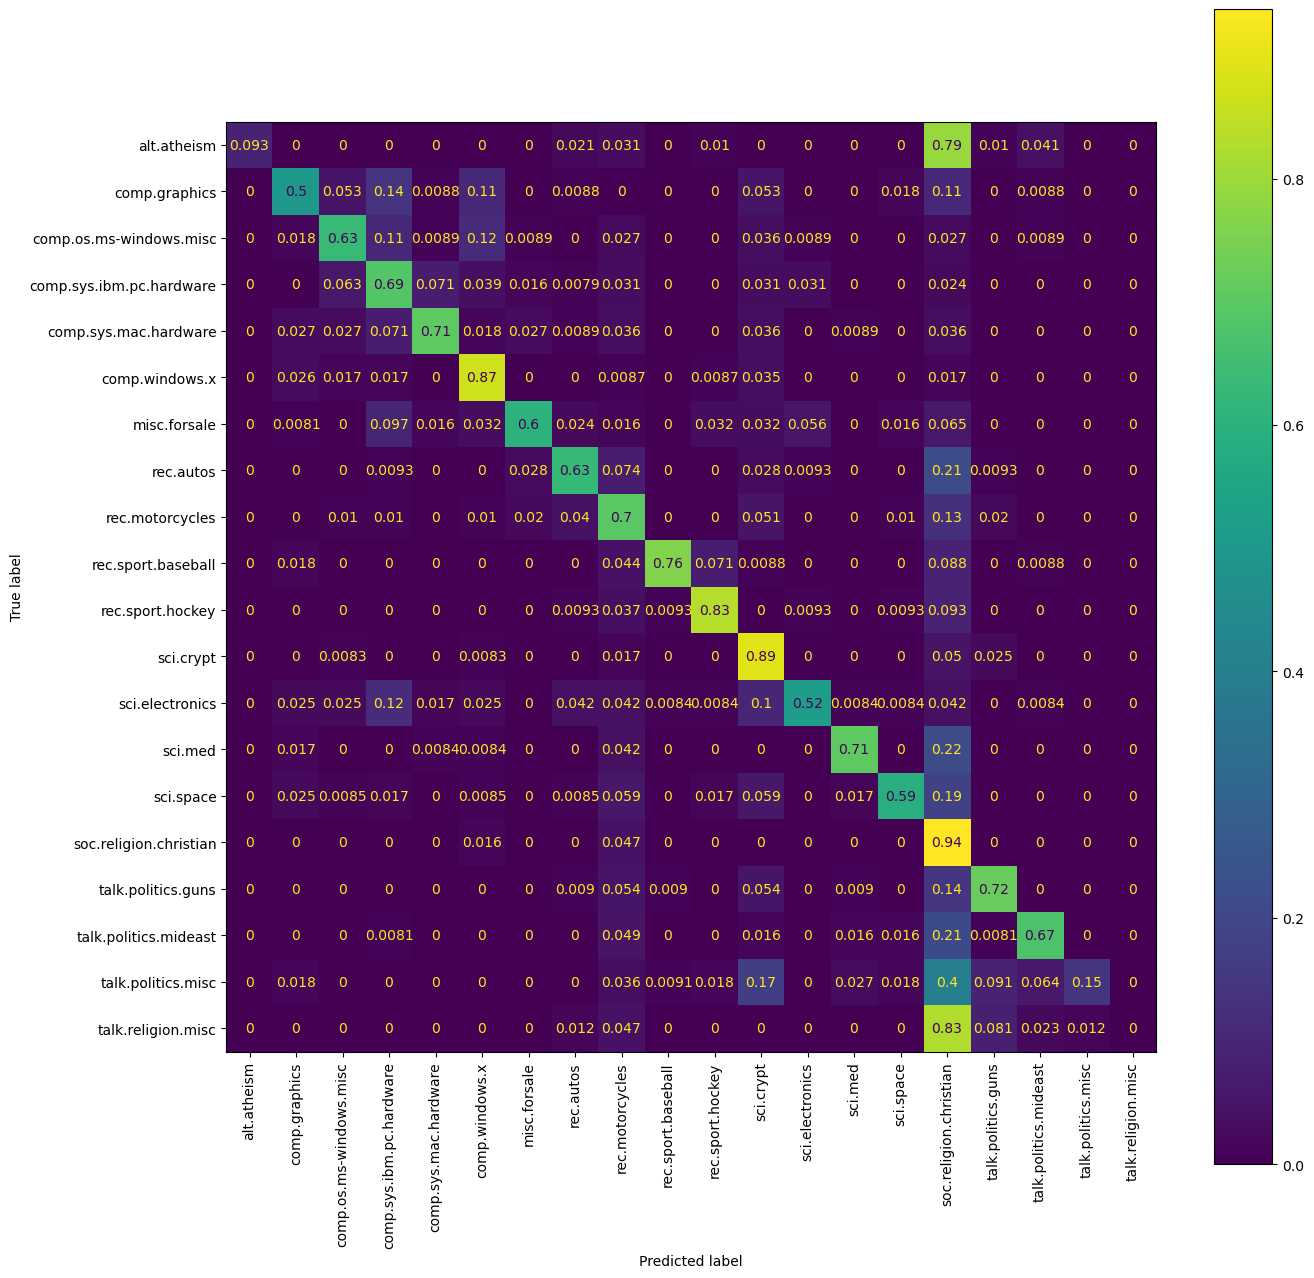

In [119]:
# Set the size of the plot.
fig,ax = plt.subplots(figsize=(15,15))
# Create the confusion matrix. 

disp = ConfusionMatrixDisplay.from_estimator(nb_classifier,validation_vec,val_labels,xticks_rotation='vertical',ax=ax,normalize='true',display_labels=filter_training_corps.target_names)

Similar to what we saw in the slides, the y-axis represents the true labels and the x-axis represents the predictions. Each square's brightness represents the number of posts assigned to that class. What we ideally want is brightness along the diagonal (top-left to bottom-right) which represent correct predictions, and little to no brightness anywhere else. 

Looking at the confusion matrix above, we can make a few observations:
The more specific a topic is, the better the prediction result. Hockey and cryptography are good examples. This intuitively makes sense.
Topics with a lot of word overlap tend to have higher errors. For example, the majority of atheism and religion.misc posts are classified under christianity. In general, the christianity column has a prevalence of brighter squares with misclassified posts from politics.misc, politics.mideast, etc.
There's a smaller, secondary cluster of errors around the computer-related topics (e.g. posts in electronics being misclassified as hardware). 

Seeing the results of this matrix, at least there are plausible explanations for the discrepancies.
Let's take a look at precision and recall for each label:

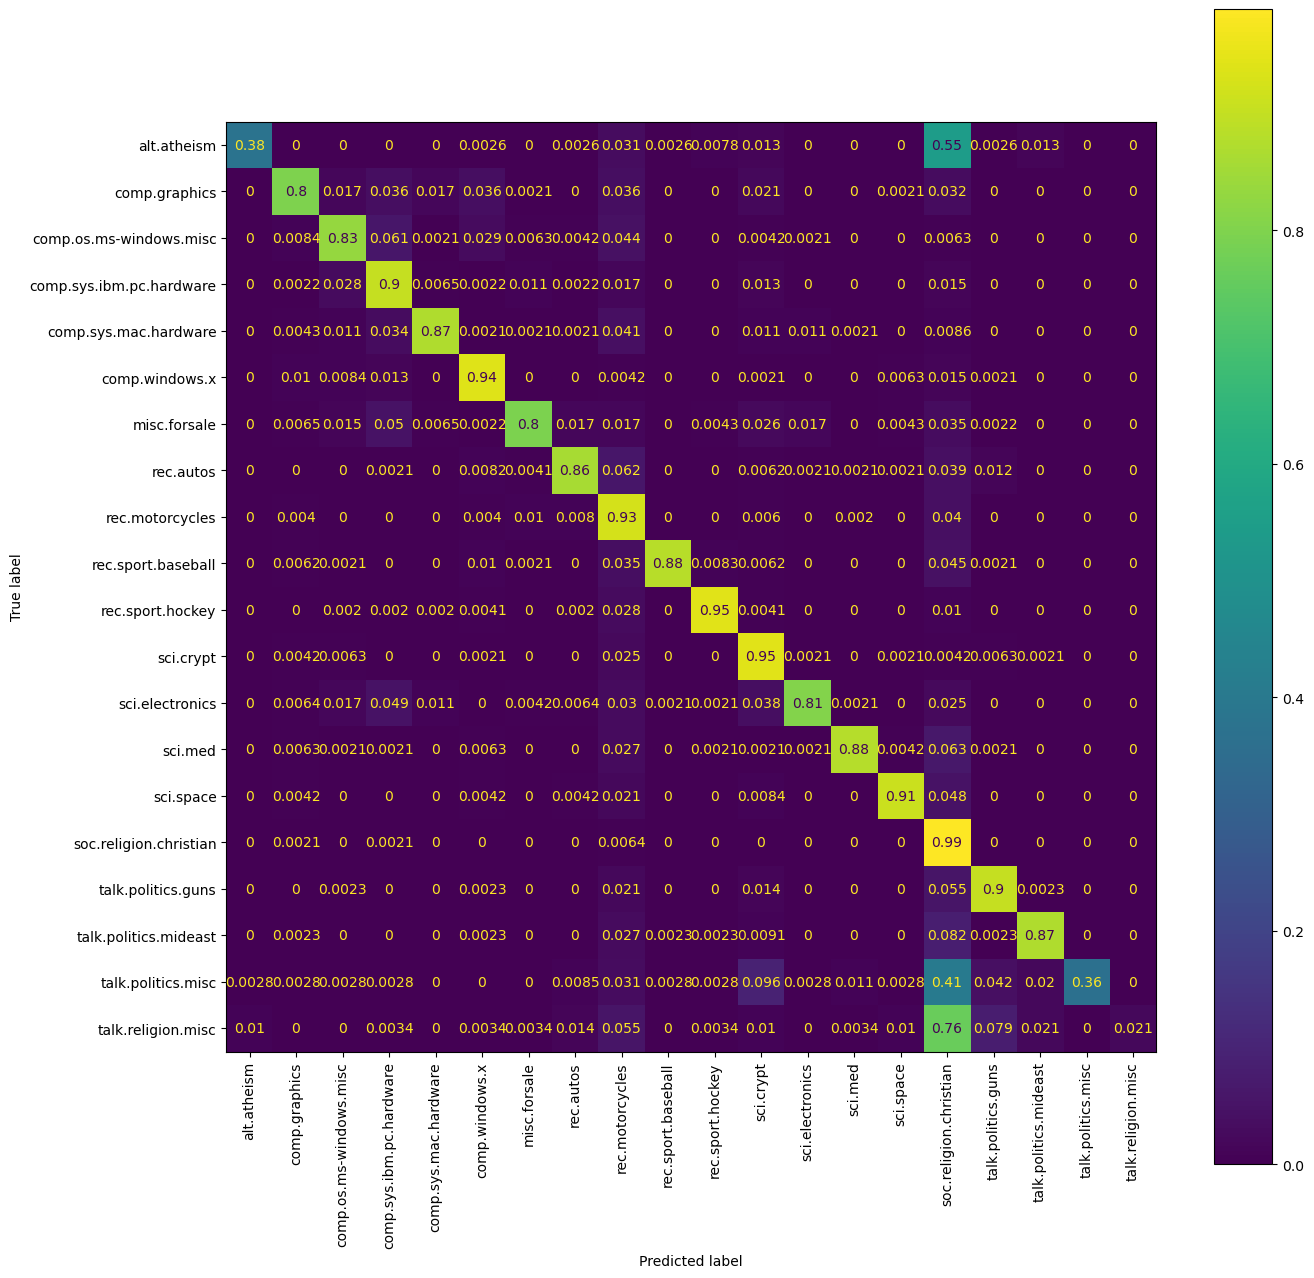

In [122]:
fig,ax1 = plt.subplots(figsize=(15,15))
dist = ConfusionMatrixDisplay.from_estimator(nb_classifier,new_train_feature_vec,train_labels,normalize='true',display_labels=filter_training_corps.target_names,ax=ax1,xticks_rotation='vertical')

In [124]:
print(metrics.classification_report(val_labels, val_pred, target_names=filter_training_corps.target_names))

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.09      0.17        97
           comp.graphics       0.73      0.50      0.59       114
 comp.os.ms-windows.misc       0.74      0.63      0.68       112
comp.sys.ibm.pc.hardware       0.56      0.69      0.61       127
   comp.sys.mac.hardware       0.83      0.71      0.76       112
          comp.windows.x       0.69      0.87      0.77       115
            misc.forsale       0.87      0.60      0.71       124
               rec.autos       0.76      0.63      0.69       108
         rec.motorcycles       0.47      0.70      0.56        99
      rec.sport.baseball       0.96      0.76      0.85       113
        rec.sport.hockey       0.83      0.83      0.83       108
               sci.crypt       0.57      0.89      0.69       120
         sci.electronics       0.82      0.52      0.64       119
                 sci.med       0.89      0.71      0.79       119
         

/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

A few observations:
Atheism has a perfect precision score but terrible recall, signalling that the model was right when it classified something as under atheism, but missed the vast majority in the corpus. The model didn't classify anything under religion.misc.
The more specific the topic, the better it tends to do.

## Improving the model

Let's try to do better. One thing that's likely an issue is the sheer number 
of features we have relative to how little data there is.

In [126]:
print('Training data size: {}'.format(len(train_data)))
print('Number of training features: {}'.format(len(new_train_feature_vec[0].toarray().flatten())))

Training data size: 9051
Number of training features: 51637


So we can experiment with:
Removing stop words because topic identification likely depends more on keywords rather than sequences in this case.
Using the token lemma rather than the text.

We can't get away with the blank pipeline since we need a bunch of components to generate the lemma. So we'll load the en_core_web_sm model and disable named-entity recognition and parsing in the tokenizer callback.

In [127]:
nlp = spacy.load('en_core_web_sm')

In [128]:
unwanted_pipes = ['ner', 'parser']
def spacy_tokenizer_modif(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma for t in nlp(doc) if \
                not t.is_punct and \
                not t.is_space and \
                not t.is_stop and \
                t.is_alpha
               ]

We need to re-vectorize the training set with the new tokenizer. Because there are certain components enabled, this is going to take longer (a few mins). Take a look at these link for ways to further optimize spaCy's pipeline:

In [129]:
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer_modif)
train_features_vects = vectorizer.fit_transform(train_data)

In [131]:
# Check the number of features now.
print('Number of training features: {}'.format(len(train_features_vects[0].toarray().flatten())))

Number of training features: 42714


A little better but still not great. Let's retrain our classifier and see what happens.

In [132]:
nb_classifier.fit(train_features_vects,train_labels)
train_preds = nb_classifier.predict(train_features_vects)
print(f"F1 score on initial training set: {metrics.f1_score(train_labels,train_preds,average='macro')}")

F1 score on initial training set: 0.8398883700432671


We managed to squeeze out a few percentage points. Let's look at the confusion matrix and classification report.

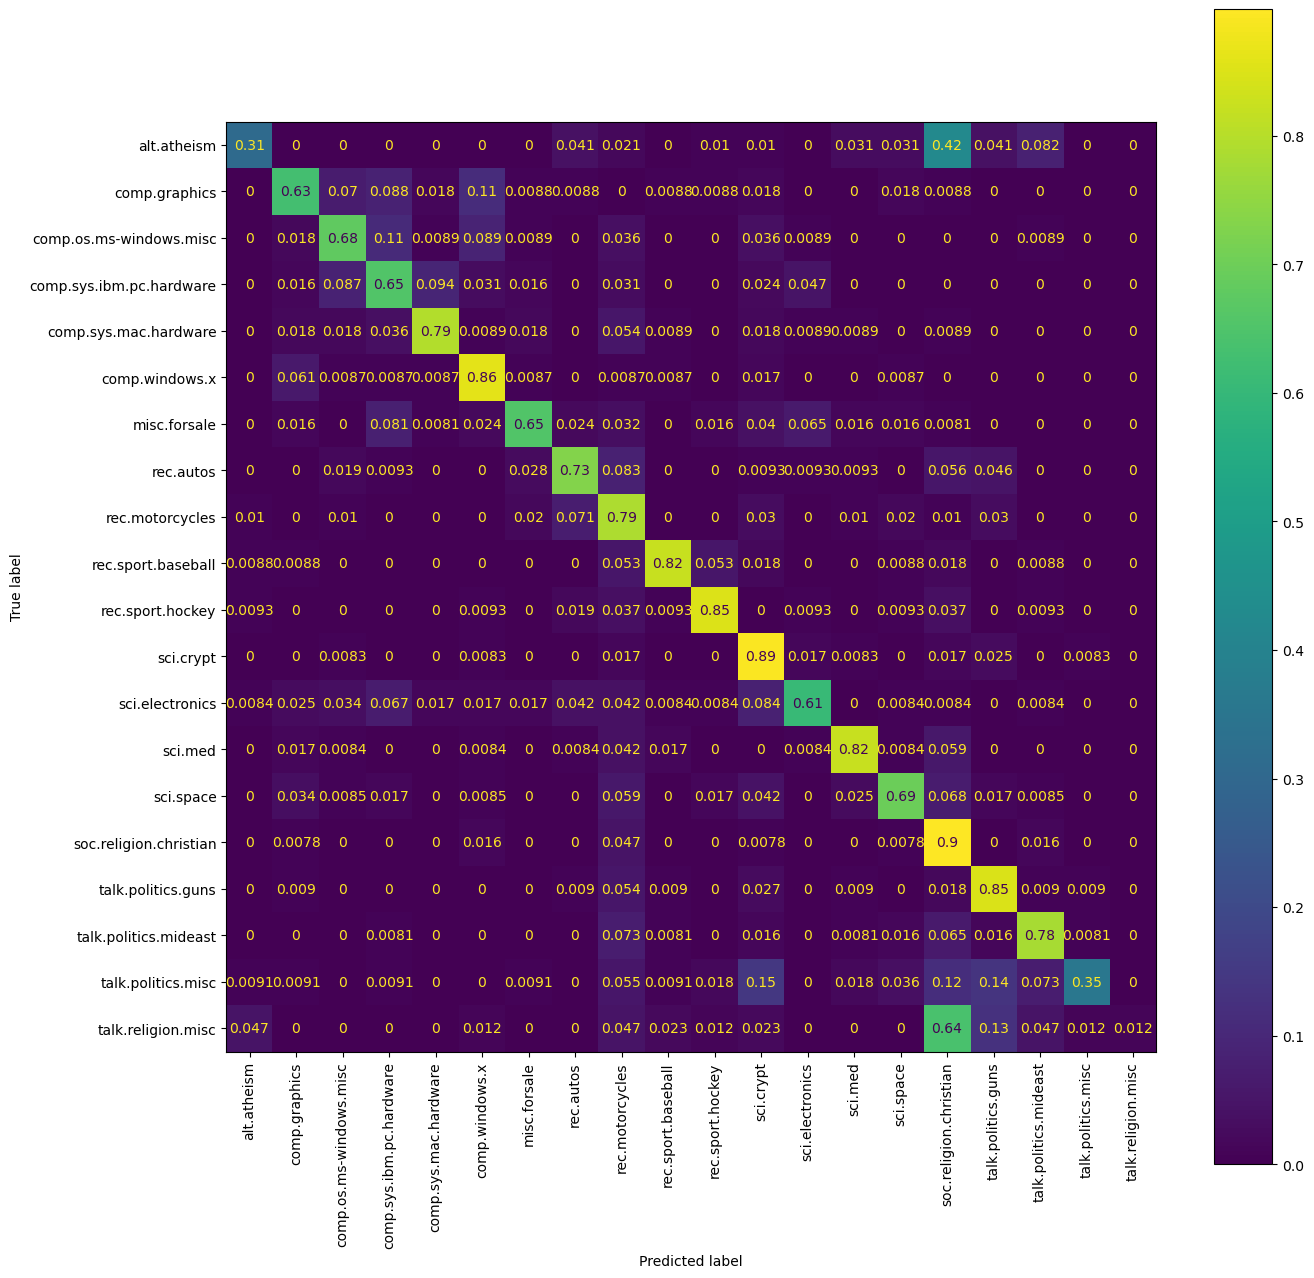

In [134]:
fig,ax = plt.subplots(figsize=(15,15))
valid_vec = vectorizer.transform(val_data)
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier,valid_vec,val_labels,ax=ax,display_labels=filter_training_corps.target_names,xticks_rotation='vertical',normalize='true')

In [136]:
val_preds = nb_classifier.predict(valid_vec)
print('Validation F1 score with fewer features: {}'.format(metrics.f1_score(val_labels, val_preds, average='macro')))

Validation F1 score with fewer features: 0.6723713085312655


In the confusion matrix, the squares in the christian column have dimmed, signalling fewer classification errors. And although atheism now classifies better, that topic along with religion.misc remain big sources of overall errors.
Let's assume for now that we can't get or generate more data.

Next, we can try tuning a hyperparameter on the classifier. For Naive Bayes, we'll adjust the the alpha smoothing factor we discussed in the slides. But rather than trying a bunch ourselves, we can use a combination of Grid Search and Cross Validation.
Grid search involves having the computer try a list of hyperparameter values for us, and returning the best performing value. The list of hyperparameter values to try is supplied by us. Grid search is a basic technique and there are a number of other techniques such as random search and bayesian optimization.
Cross validation is a way to evaluate machine learning models on limited datasets. It randomly splits the data into k-groups. One group is set aside as the holdout set while the classifier trains a model on the remaining groups. The resulting model is then used on the holdout group and the score recorded. This repeats itself until all groups have been used as a holdout set and an average score returned.
Scikit-learn has modules to handle both for us:

In [137]:
# The alpha values to try.
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0,],}

# Instantiate the search with the model we want to try and fit it on the training data.
multinomial_nb_grid = model_selection.GridSearchCV(MultinomialNB(), param_grid=params, scoring='f1_macro', n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(train_features_vects, train_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='f1_macro', verbose=5)

The resulting GridSearchCV object has a number of attributes you can explore:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

We're interested in the best performing parameter value(s).

In [138]:
print('Best parameter value(s): {}'.format(multinomial_nb_grid.best_params_))

Best parameter value(s): {'alpha': 0.01}


You can directly access the best estimator found by the search. Let's try using it on the validation set.

In [140]:
best_nb_classifier = multinomial_nb_grid.best_estimator_
val_preds = best_nb_classifier.predict(valid_vec)
print('Validation F1 score with fewer features: {}'.format(metrics.f1_score(val_labels, val_preds, average='macro')))

Validation F1 score with fewer features: 0.7321088520594417


So we got another decent jump after using the the optimal alpha value. Let's look at the confusion matrix (using the best estimator so far) and classification report again.

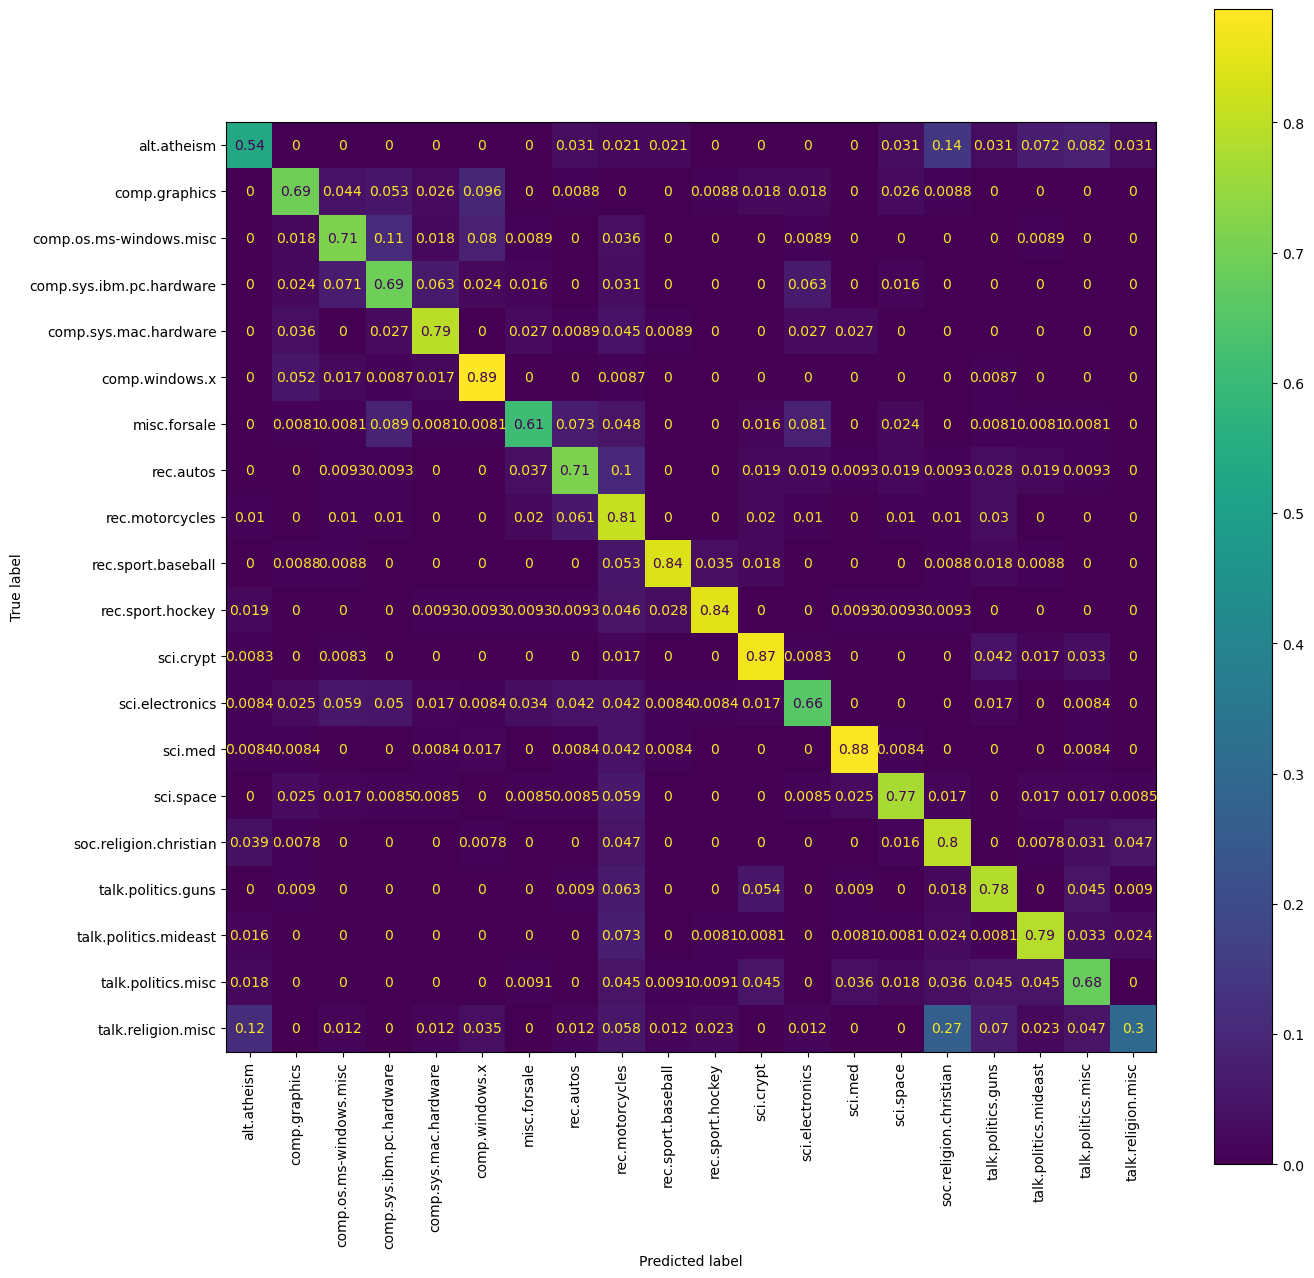

In [144]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(best_nb_classifier, valid_vec, val_labels, normalize='true', display_labels=filter_training_corps.target_names, xticks_rotation='vertical', ax=ax)

In [146]:
print(metrics.classification_report(val_labels, val_preds, target_names=filter_training_corps.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.68      0.54      0.60        97
           comp.graphics       0.75      0.69      0.72       114
 comp.os.ms-windows.misc       0.72      0.71      0.72       112
comp.sys.ibm.pc.hardware       0.68      0.69      0.68       127
   comp.sys.mac.hardware       0.80      0.79      0.80       112
          comp.windows.x       0.76      0.89      0.82       115
            misc.forsale       0.80      0.61      0.69       124
               rec.autos       0.72      0.71      0.72       108
         rec.motorcycles       0.46      0.81      0.58        99
      rec.sport.baseball       0.90      0.84      0.87       113
        rec.sport.hockey       0.90      0.84      0.87       108
               sci.crypt       0.81      0.87      0.84       120
         sci.electronics       0.72      0.66      0.69       119
                 sci.med       0.88      0.88      0.88       119
         

## Creating the final Naive Bayes classifier.

Let's train the classifier we'll use on the test set. We'll use the entire original training set (including validation data) and the ideal alpha param. 
We'll also use scikit-learn's Pipeline to specify a series of transformation and training steps so we can vectorize and fit a model with one call. Creating a few of these pipelines can help speed up your development and stay organized:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [147]:
text_classifier = Pipeline([
    ('vectorizer',TfidfVectorizer(tokenizer=spacy_tokenizer_modif)),
    ('classifier',MultinomialNB(alpha=0.01))
])

In [148]:
text_classifier.fit(filter_training_corps.data,filter_training_corps.target)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer_modif at 0x7ff67b034200>)),
                ('classifier', MultinomialNB(alpha=0.01))])

In [150]:
filter_test_corps =  fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))